# Model Building

## Attaching Resources

### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier,VotingClassifier,StackingClassifier, BaggingClassifier
from sklearn.svm import SVC
import pickle

from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

<Figure size 3750x2000 with 0 Axes>

### Adding Dataset

In [2]:
wp = pd.read_csv(r'C:\Users\Kunal Mallick\Documents\GitHub\Churn_Prediction\Feature Engineering & Feature Extraction\Feature.csv')

wp

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,churn
0,2.692632,1.181955,-1.974883,-0.100607,-0.155825,-0.154433,-0.641741,0.298489,0
1,2.671870,-0.784750,0.078181,0.367823,0.581266,0.604552,-1.094303,0.230088,0
2,-1.018521,0.929002,-1.516071,0.874506,1.351654,-0.965564,-0.950209,-0.014731,0
3,-0.869100,5.387429,0.648361,-0.809415,1.725970,-2.427427,1.162079,0.017789,0
4,-0.914663,2.872560,3.281747,-1.473765,0.947660,-0.115989,0.174023,-0.001529,0
...,...,...,...,...,...,...,...,...,...
4864,3.302251,0.589227,-1.398595,0.030614,-0.241689,0.305684,0.478651,-0.602262,0
4865,-1.013068,-0.198165,-0.287355,-0.303650,0.053433,2.396454,-0.527177,-0.020233,0
4866,-1.069227,-1.027929,0.498354,0.526256,0.921987,0.287544,-0.862499,-0.022013,1
4867,-1.044157,-0.116334,-0.503720,0.753861,-0.089537,-1.400884,-0.091477,-0.016279,0


## Splitting The Data Into Target and Independent set

In [3]:
x = wp.iloc[:,:-1]
y = wp.iloc[:,-1]

In [4]:
x

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7
0,2.692632,1.181955,-1.974883,-0.100607,-0.155825,-0.154433,-0.641741,0.298489
1,2.671870,-0.784750,0.078181,0.367823,0.581266,0.604552,-1.094303,0.230088
2,-1.018521,0.929002,-1.516071,0.874506,1.351654,-0.965564,-0.950209,-0.014731
3,-0.869100,5.387429,0.648361,-0.809415,1.725970,-2.427427,1.162079,0.017789
4,-0.914663,2.872560,3.281747,-1.473765,0.947660,-0.115989,0.174023,-0.001529
...,...,...,...,...,...,...,...,...
4864,3.302251,0.589227,-1.398595,0.030614,-0.241689,0.305684,0.478651,-0.602262
4865,-1.013068,-0.198165,-0.287355,-0.303650,0.053433,2.396454,-0.527177,-0.020233
4866,-1.069227,-1.027929,0.498354,0.526256,0.921987,0.287544,-0.862499,-0.022013
4867,-1.044157,-0.116334,-0.503720,0.753861,-0.089537,-1.400884,-0.091477,-0.016279


In [5]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4864    0
4865    0
4866    1
4867    0
4868    0
Name: churn, Length: 4869, dtype: int64

## K-fold Cross Validation

In [6]:
kf = KFold(n_splits=10)

mod = [LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), SVC()]

for i in range(len(mod)):
    kf_scores = cross_val_score(mod[i],x,y,cv=kf)
    print('Creating Model With ' + str(mod[i]))
    print('Testing Accuracy of are Model is : ' + str(kf_scores.mean()))
    print('Printing All Training Model Accuracy : \n' + str(kf_scores))
    print('\n')

Creating Model With LogisticRegression()
Testing Accuracy of are Model is : 0.8587036614529199
Printing All Training Model Accuracy : 
[0.862423   0.87679671 0.87679671 0.83572895 0.85010267 0.83572895
 0.85420945 0.87474333 0.83367556 0.88683128]


Creating Model With KNeighborsClassifier()
Testing Accuracy of are Model is : 0.8396041946578109
Printing All Training Model Accuracy : 
[0.84804928 0.85831622 0.862423   0.81930185 0.82135524 0.81930185
 0.83367556 0.85010267 0.8110883  0.87242798]


Creating Model With DecisionTreeClassifier()
Testing Accuracy of are Model is : 0.7517005940460196
Printing All Training Model Accuracy : 
[0.75154004 0.73305955 0.77412731 0.72895277 0.73100616 0.75564682
 0.77412731 0.75154004 0.73511294 0.781893  ]


Creating Model With RandomForestClassifier()
Testing Accuracy of are Model is : 0.857471206090873
Printing All Training Model Accuracy : 
[0.86036961 0.87474333 0.87679671 0.83572895 0.85010267 0.83367556
 0.85215606 0.87474333 0.83162218 0.884

## Splitting The Data Into Traning and Testing Dataset

In [7]:
xtrain = wp.iloc[:4382,:-1]
xtest = wp.iloc[4382:,:-1]

In [8]:
xtrain.tail()

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7
4377,-1.074116,-0.212870,-0.304997,1.045537,2.892594,0.502559,-0.027189,-0.005711
4378,-0.909893,2.244224,3.928244,-0.393207,-0.365829,-1.607216,-0.835444,-0.017529
4379,-1.024085,0.483378,-1.122099,-0.609972,-0.321748,0.373674,1.031197,-0.005353
4380,-1.031579,-0.294364,-0.151175,1.801000,1.127646,0.918377,-0.181678,-0.015500
4381,-0.879694,3.290454,2.821279,-1.793256,-0.956394,-0.359610,0.844327,-0.001759


In [9]:
xtest.head()

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7
4382,3.545567,2.077000,3.783931,-2.304503,1.992722,-0.464948,0.590475,-0.889746
4383,3.007186,2.818091,3.145246,-0.851159,1.578415,-0.819221,-0.096708,-0.049716
4384,-1.087611,-1.199371,0.366498,-2.482078,-2.383212,-2.340717,-0.335399,-0.025734
4385,-1.095536,-1.293356,0.589099,-0.261749,-0.902991,-1.781985,0.854898,-0.013833
4386,-1.047497,-0.731957,0.117622,-0.515167,-0.806419,-0.220464,-0.781709,-0.025578


In [10]:
ytrain = wp.iloc[:4382,-1]
ytest = wp.iloc[4382:,-1]

In [11]:
ytrain.tail()

4377    1
4378    0
4379    1
4380    0
4381    0
Name: churn, dtype: int64

In [12]:
ytest.head()

4382    0
4383    1
4384    0
4385    0
4386    0
Name: churn, dtype: int64

## Preparing Model From The Dataset

### Picking Model Lowest Training And Testing Difference

In [15]:
def predict(model):
    print('Creating Model With ' + str(model))
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    print('Training Accuracy of are Model is : ' + str(round(model.score(xtrain,ytrain), 2)) + '%')
    print('Testing Accuracy of are Model is : ' + str(round(model.score(xtest,ytest), 2)) + '%')
    print(classification_report(ytest,ypred))

In [14]:
models = [  LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(), BaggingClassifier(DecisionTreeClassifier()),
            RandomForestClassifier(), BaggingClassifier(RandomForestClassifier()), SVC()]

for i in range(len(models)):
    predict(models[i])

Creating Model With LogisticRegression()
Training Accuracy of are Model is : 0.86%
Testing Accuracy of are Model is : 0.89%
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       432
           1       0.00      0.00      0.00        55

    accuracy                           0.89       487
   macro avg       0.44      0.50      0.47       487
weighted avg       0.79      0.89      0.83       487

Creating Model With KNeighborsClassifier()


Training Accuracy of are Model is : 0.86%
Testing Accuracy of are Model is : 0.87%
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       432
           1       0.11      0.02      0.03        55

    accuracy                           0.87       487
   macro avg       0.50      0.50      0.48       487
weighted avg       0.80      0.87      0.83       487

Creating Model With DecisionTreeClassifier()
Training Accuracy of are Model is : 1.0%
Testing Accuracy of are Model is : 0.75%
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       432
           1       0.10      0.16      0.13        55

    accuracy                           0.75       487
   macro avg       0.49      0.49      0.49       487
weighted avg       0.80      0.75      0.77       487

Creating Model With BaggingClassifier(estimator=DecisionTreeClassifier())
Training Accuracy of are Model is : 0.97%
Testing Accuracy of 

### Performing Hyperparameter Tuning

#### Tuning Decision Tree Classifier With Bagging Classifier

In [15]:
params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [2,3,4,5],
    'min_samples_split': [2,3,4,5],
    'min_samples_leaf': [1,2,3,4,5],
    'min_weight_fraction_leaf': [0,1,2,3,4,5],
    'max_features': ['auto', 'sqrt', 'log2']
    }

In [16]:
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=params, n_jobs=-1)

grid.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'min_weight_fraction_leaf': [0, 1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']})

In [17]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0,
 'splitter': 'random'}

In [18]:
predict(AdaBoostClassifier( DecisionTreeClassifier( criterion = 'gini', max_depth = 5, max_features = 'auto', min_samples_leaf = 4,
                                                    min_samples_split = 2, min_weight_fraction_leaf = 0, splitter = 'random'),
                            learning_rate= 1, n_estimators=100))

Creating Model With AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                    max_features='auto',
                                                    min_samples_leaf=4,
                                                    min_weight_fraction_leaf=0,
                                                    splitter='random'),
                   learning_rate=1, n_estimators=100)
Training Accuracy of are Model is : 0.89%
Testing Accuracy of are Model is : 0.86%
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       432
           1       0.06      0.02      0.03        55

    accuracy                           0.86       487
   macro avg       0.47      0.49      0.48       487
weighted avg       0.79      0.86      0.82       487



#### Tuning Gradient Boosting Classifier

In [19]:
predict(GradientBoostingClassifier())

Creating Model With GradientBoostingClassifier()
Training Accuracy of are Model is : 0.86%
Testing Accuracy of are Model is : 0.88%
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       432
           1       0.00      0.00      0.00        55

    accuracy                           0.88       487
   macro avg       0.44      0.50      0.47       487
weighted avg       0.79      0.88      0.83       487



In [20]:
params = {
    'loss' : ['log_loss', 'deviance', 'exponential'],
    'criterion' : ['friedman_mse', 'squared_error'],
    'learning_rate' : [0.1,0.2,0.3,0.4,0.5],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'n_estimators' : [1,2,3,4,5]
    }

In [21]:
grid = GridSearchCV(GradientBoostingClassifier(), param_grid=params, n_jobs = -1)

grid.fit(xtrain,ytrain)

GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'loss': ['log_loss', 'deviance', 'exponential'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 2, 3, 4, 5]})

In [22]:
grid.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_features': 'auto',
 'n_estimators': 1}

In [23]:
predict(AdaBoostClassifier(GradientBoostingClassifier(criterion = 'friedman_mse', n_estimators=1, learning_rate = 0.1, loss='log_loss',max_features='auto'),
                           learning_rate= 1.5, n_estimators=100))

Creating Model With AdaBoostClassifier(estimator=GradientBoostingClassifier(max_features='auto',
                                                        n_estimators=1),
                   learning_rate=1.5, n_estimators=100)
Training Accuracy of are Model is : 0.86%
Testing Accuracy of are Model is : 0.89%
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       432
           1       0.00      0.00      0.00        55

    accuracy                           0.89       487
   macro avg       0.44      0.50      0.47       487
weighted avg       0.79      0.89      0.83       487



#### Tuning Random Forest Classifier With Bagging Classifier

In [24]:
params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators' : [10,20,30,40,50],
    'max_depth': [2,3,4,5],
    'min_samples_split': [2,3,4,5],
    'min_samples_leaf': [1,2,3,4,5],
    'min_weight_fraction_leaf': [0,1,2,3,4,5],
    'max_features': ['sqrt', 'log2']
    }

In [25]:
grid = GridSearchCV((RandomForestClassifier()), param_grid=params, n_jobs= -1)

grid.fit(xtrain,ytrain)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'min_weight_fraction_leaf': [0, 1, 2, 3, 4, 5],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [26]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0,
 'n_estimators': 10}

In [31]:
predict(RandomForestClassifier( criterion = 'gini',  max_depth = 4,  max_features = 'sqrt',  min_samples_leaf = 1,
                                min_samples_split = 4,  min_weight_fraction_leaf = 0,  n_estimators= 10))

Creating Model With RandomForestClassifier(max_depth=4, min_samples_split=4,
                       min_weight_fraction_leaf=0, n_estimators=10)
Training Accuracy of are Model is : 0.86%
Testing Accuracy of are Model is : 0.89%
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       432
           1       0.00      0.00      0.00        55

    accuracy                           0.89       487
   macro avg       0.44      0.50      0.47       487
weighted avg       0.79      0.89      0.83       487



#### Tuning Logistic Regression With AdaBoost Classifier

In [28]:
predict(AdaBoostClassifier(LogisticRegression()))

Creating Model With AdaBoostClassifier(estimator=LogisticRegression())
Training Accuracy of are Model is : 0.86%
Testing Accuracy of are Model is : 0.89%
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       432
           1       0.00      0.00      0.00        55

    accuracy                           0.89       487
   macro avg       0.44      0.50      0.47       487
weighted avg       0.79      0.89      0.83       487



#### Tuning KNeighborsClassifier With Bagging Classifier

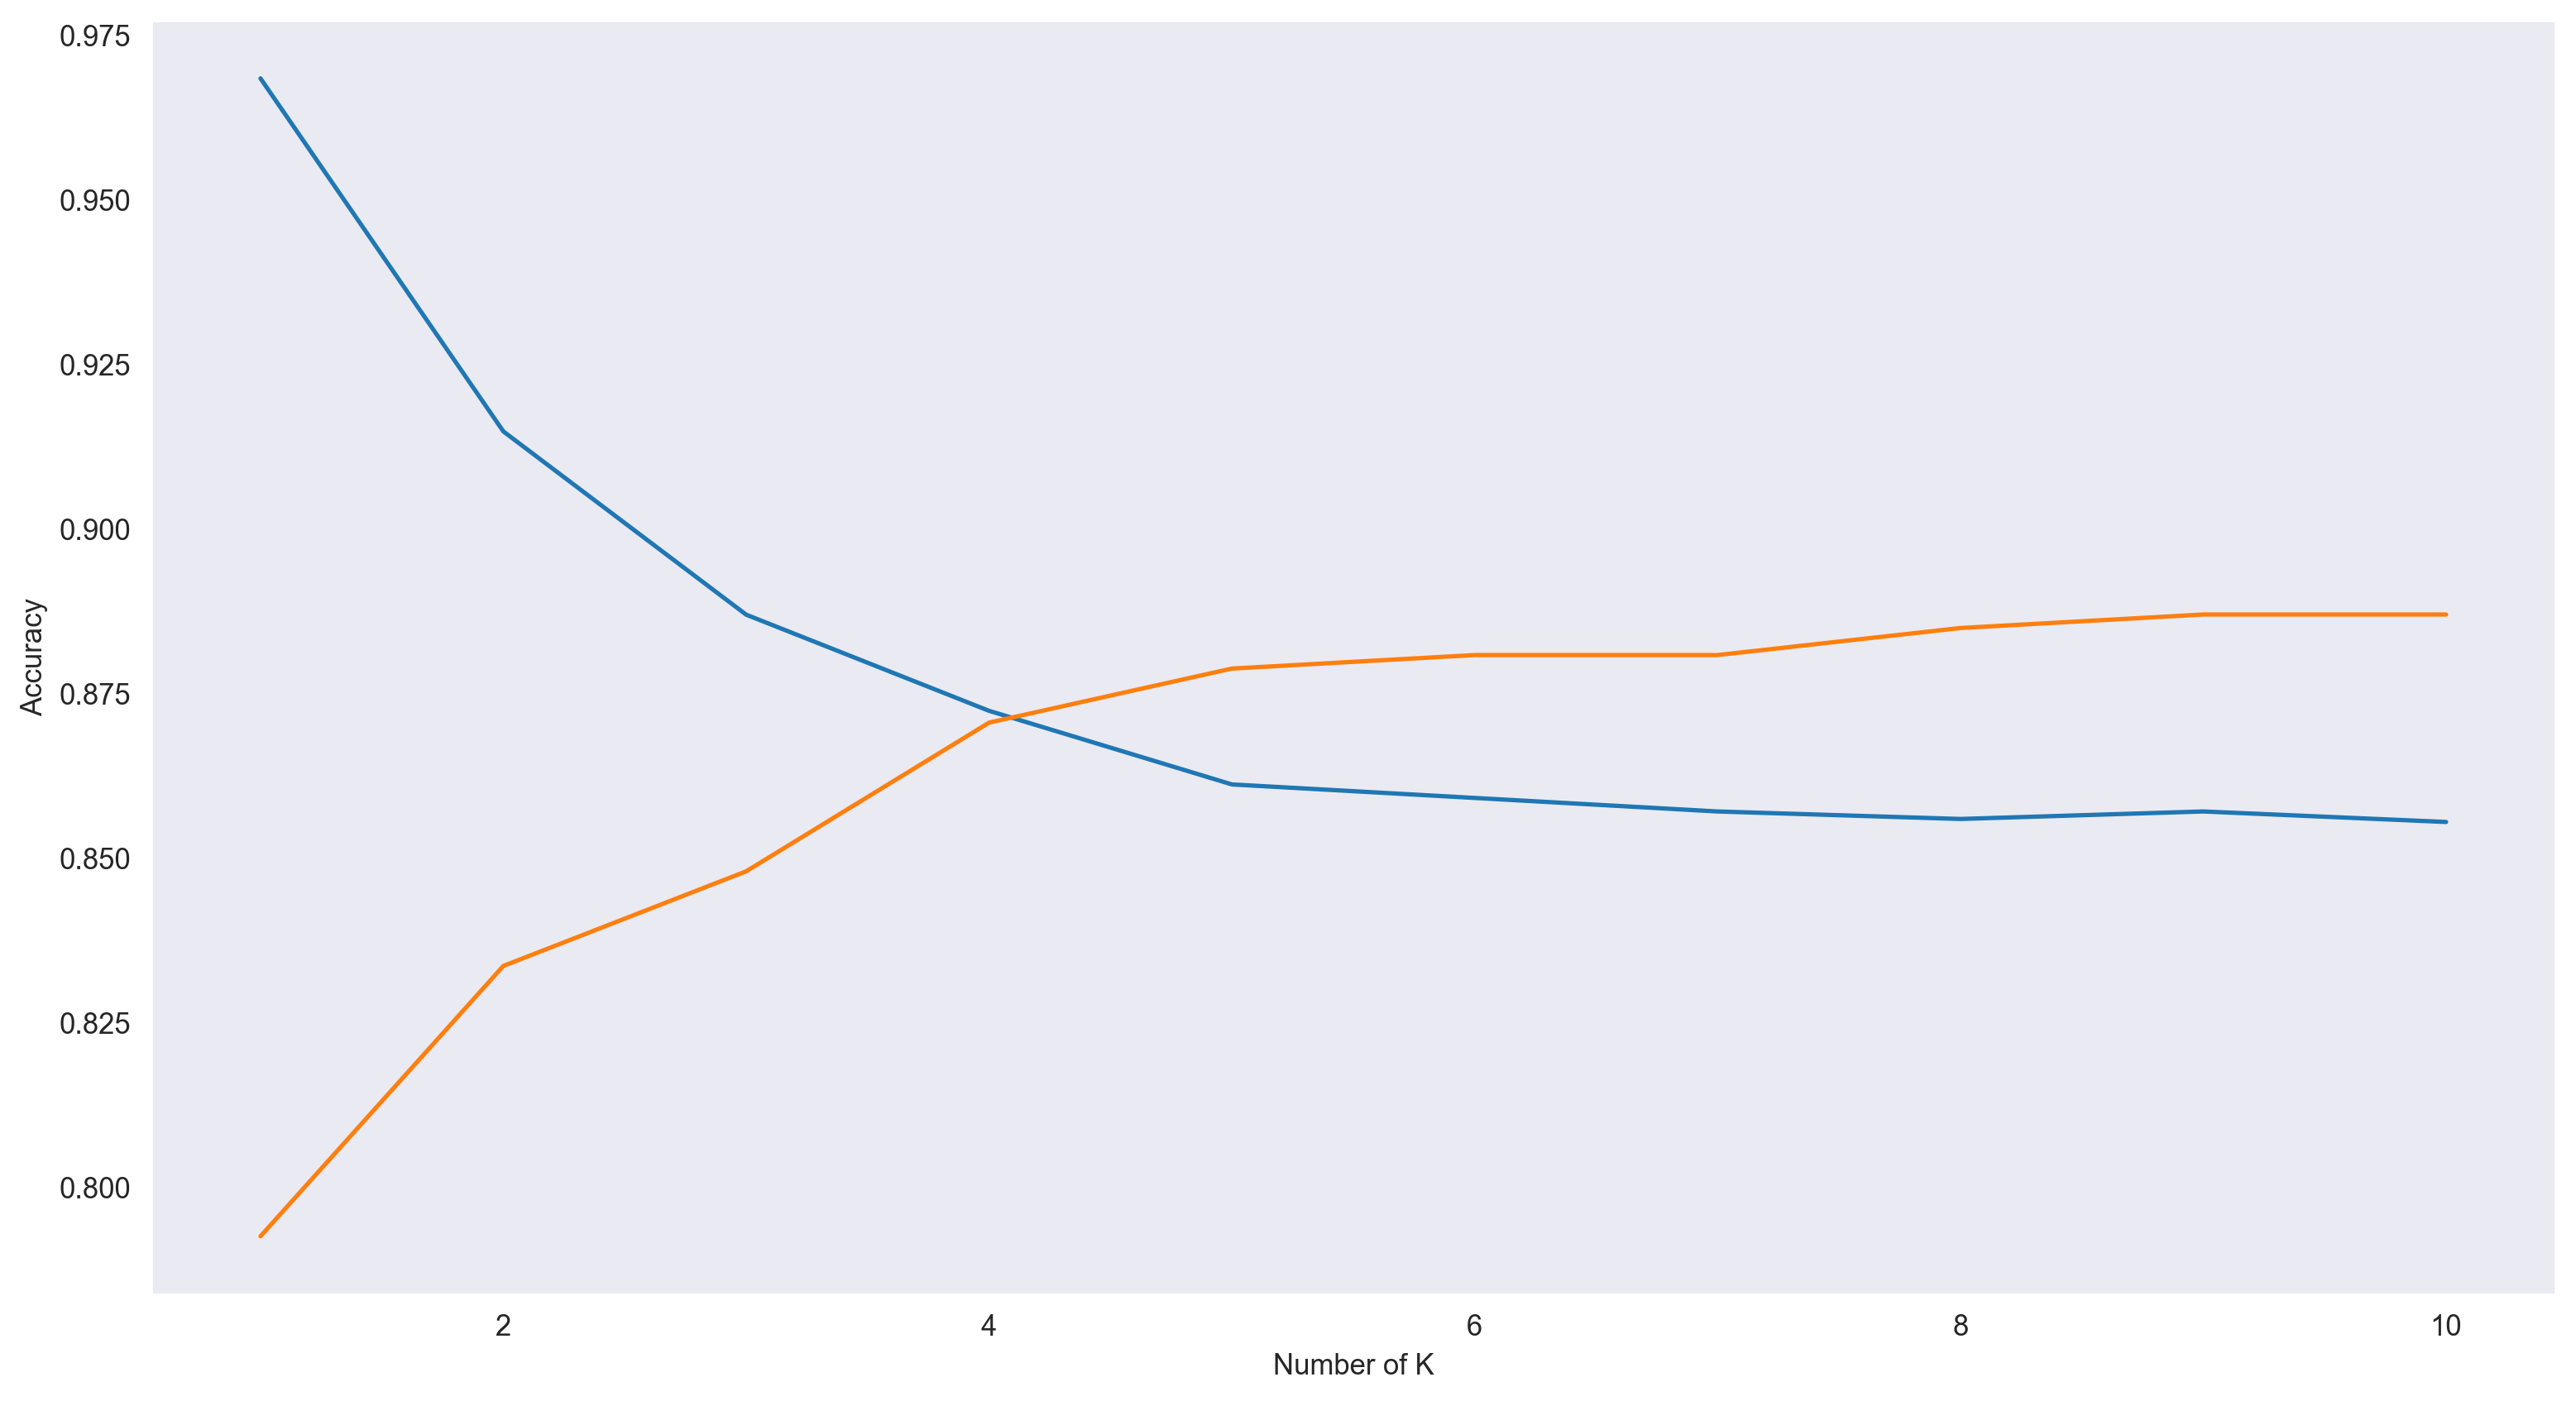

In [29]:
trainac = []
testac = []

for i in range(1,11):
    knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=i),n_estimators = 10)
    knn.fit(xtrain,ytrain)
    ypred = knn.predict(xtest)
    
    trainac.append(knn.score(xtrain,ytrain))
    testac.append(knn.score(xtest,ytest))

plt.title('')
plt.plot(range(1,11),trainac)
plt.plot(range(1,11), testac)
plt.xlabel('Number of K')
plt.ylabel('Accuracy')
plt.grid()

In [30]:
predict(KNeighborsClassifier(n_neighbors=4))

Creating Model With KNeighborsClassifier(n_neighbors=4)
Training Accuracy of are Model is : 0.86%
Testing Accuracy of are Model is : 0.89%
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       432
           1       0.50      0.02      0.04        55

    accuracy                           0.89       487
   macro avg       0.69      0.51      0.49       487
weighted avg       0.84      0.89      0.84       487



#### Tuning SVC 

In [19]:
params = {
    'kernel' : ['poly','rbf','linear','sigmoid'],
    'C' : [0.1,0.001,0.0001,1,10],
    'gamma' : [0.1,0.001,1,10]
}

In [20]:
grid = GridSearchCV(SVC(), param_grid=params, verbose=1, n_jobs=-1)

grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


In [ ]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0,
 'splitter': 'random'}

In [ ]:
predict(SVC())

Creating Model With AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=4,
                                                    max_features='auto',
                                                    min_samples_leaf=3,
                                                    min_samples_split=5,
                                                    min_weight_fraction_leaf=0,
                                                    splitter='random'),
                   learning_rate=1, n_estimators=100)
Training Accuracy of are Model is : 0.88%
Testing Accuracy of are Model is : 0.87%
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       432
           1       0.19      0.05      0.08        55

    accuracy                           0.87       487
   macro avg       0.54      0.51      0.51       487
weighted avg       0.81      0.87      0.83       487



#### Tuning Voting Classifier

In [13]:
models = []

models.append(('ad',AdaBoostClassifier( DecisionTreeClassifier( criterion = 'gini', max_depth = 5, max_features = 'auto', min_samples_leaf = 4,
                                                                min_samples_split = 2, min_weight_fraction_leaf = 0, splitter = 'random'),
                    learning_rate= 1, n_estimators=100)))
models.append(('al',AdaBoostClassifier(LogisticRegression())))
models.append(('knn',KNeighborsClassifier(n_neighbors=4)))
models.append(('rf',RandomForestClassifier( criterion = 'gini',  max_depth = 4,  max_features = 'sqrt',  min_samples_leaf = 1,
                                min_samples_split = 4,  min_weight_fraction_leaf = 0,  n_estimators= 10)))

In [16]:
predict(VotingClassifier(estimators=models, voting = 'soft'))

Creating Model With VotingClassifier(estimators=[('ad',
                              AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                                                  max_features='auto',
                                                                                  min_samples_leaf=4,
                                                                                  min_weight_fraction_leaf=0,
                                                                                  splitter='random'),
                                                 learning_rate=1,
                                                 n_estimators=100)),
                             ('al',
                              AdaBoostClassifier(estimator=LogisticRegression())),
                             ('knn', KNeighborsClassifier(n_neighbors=4)),
                             ('rf',
                              RandomForestClassifier(max_depth=4,
 

In [17]:
predict(VotingClassifier(estimators=models, voting = 'hard'))

Creating Model With VotingClassifier(estimators=[('ad',
                              AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                                                  max_features='auto',
                                                                                  min_samples_leaf=4,
                                                                                  min_weight_fraction_leaf=0,
                                                                                  splitter='random'),
                                                 learning_rate=1,
                                                 n_estimators=100)),
                             ('al',
                              AdaBoostClassifier(estimator=LogisticRegression())),
                             ('knn', KNeighborsClassifier(n_neighbors=4)),
                             ('rf',
                              RandomForestClassifier(max_depth=4,
 

#### Tuning Stacking Classifier

In [18]:
predict(StackingClassifier( estimators = models,
                            final_estimator = AdaBoostClassifier(GradientBoostingClassifier(criterion = 'friedman_mse', n_estimators=1, learning_rate = 0.1, loss='log_loss',max_features='auto'),
                           learning_rate= 1.5, n_estimators=100)))

Creating Model With StackingClassifier(estimators=[('ad',
                                AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                                                    max_features='auto',
                                                                                    min_samples_leaf=4,
                                                                                    min_weight_fraction_leaf=0,
                                                                                    splitter='random'),
                                                   learning_rate=1,
                                                   n_estimators=100)),
                               ('al',
                                AdaBoostClassifier(estimator=LogisticRegression())),
                               ('knn', KNeighborsClassifier(n_neighbors=4)),
                               ('rf',
                                RandomFores

### Creating Final Model With Hyperparameter Value

In [60]:
final_model = 
final_model.fit(xtrain,ytrain)
ypred = final_model.predict(xtest)

#### Evaluating The Model

##### Creating Classification Report

In [61]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.64      0.96      0.77       421
           1       0.75      0.17      0.28       278

    accuracy                           0.65       699
   macro avg       0.69      0.57      0.52       699
weighted avg       0.68      0.65      0.57       699



##### Comparing Training And Testing Accuracy

In [62]:
print('Training Accuracy of are Model is : ' + str(round(final_model.score(xtrain,ytrain),2))+' %')
print('Testing Accuracy of are Model is : ' + str(round(final_model.score(xtest, ytest),2))+' %')

Training Accuracy of are Model is : 0.66 %
Testing Accuracy of are Model is : 0.65 %


## Creating Model

In [64]:
pickle.dump(final_model, open('model.pkl','wb'))